# Chapter 10 - Regression Analysis

This notebook contains code accompanying Chapter 10 Regression Analysis in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## Auto Dataset

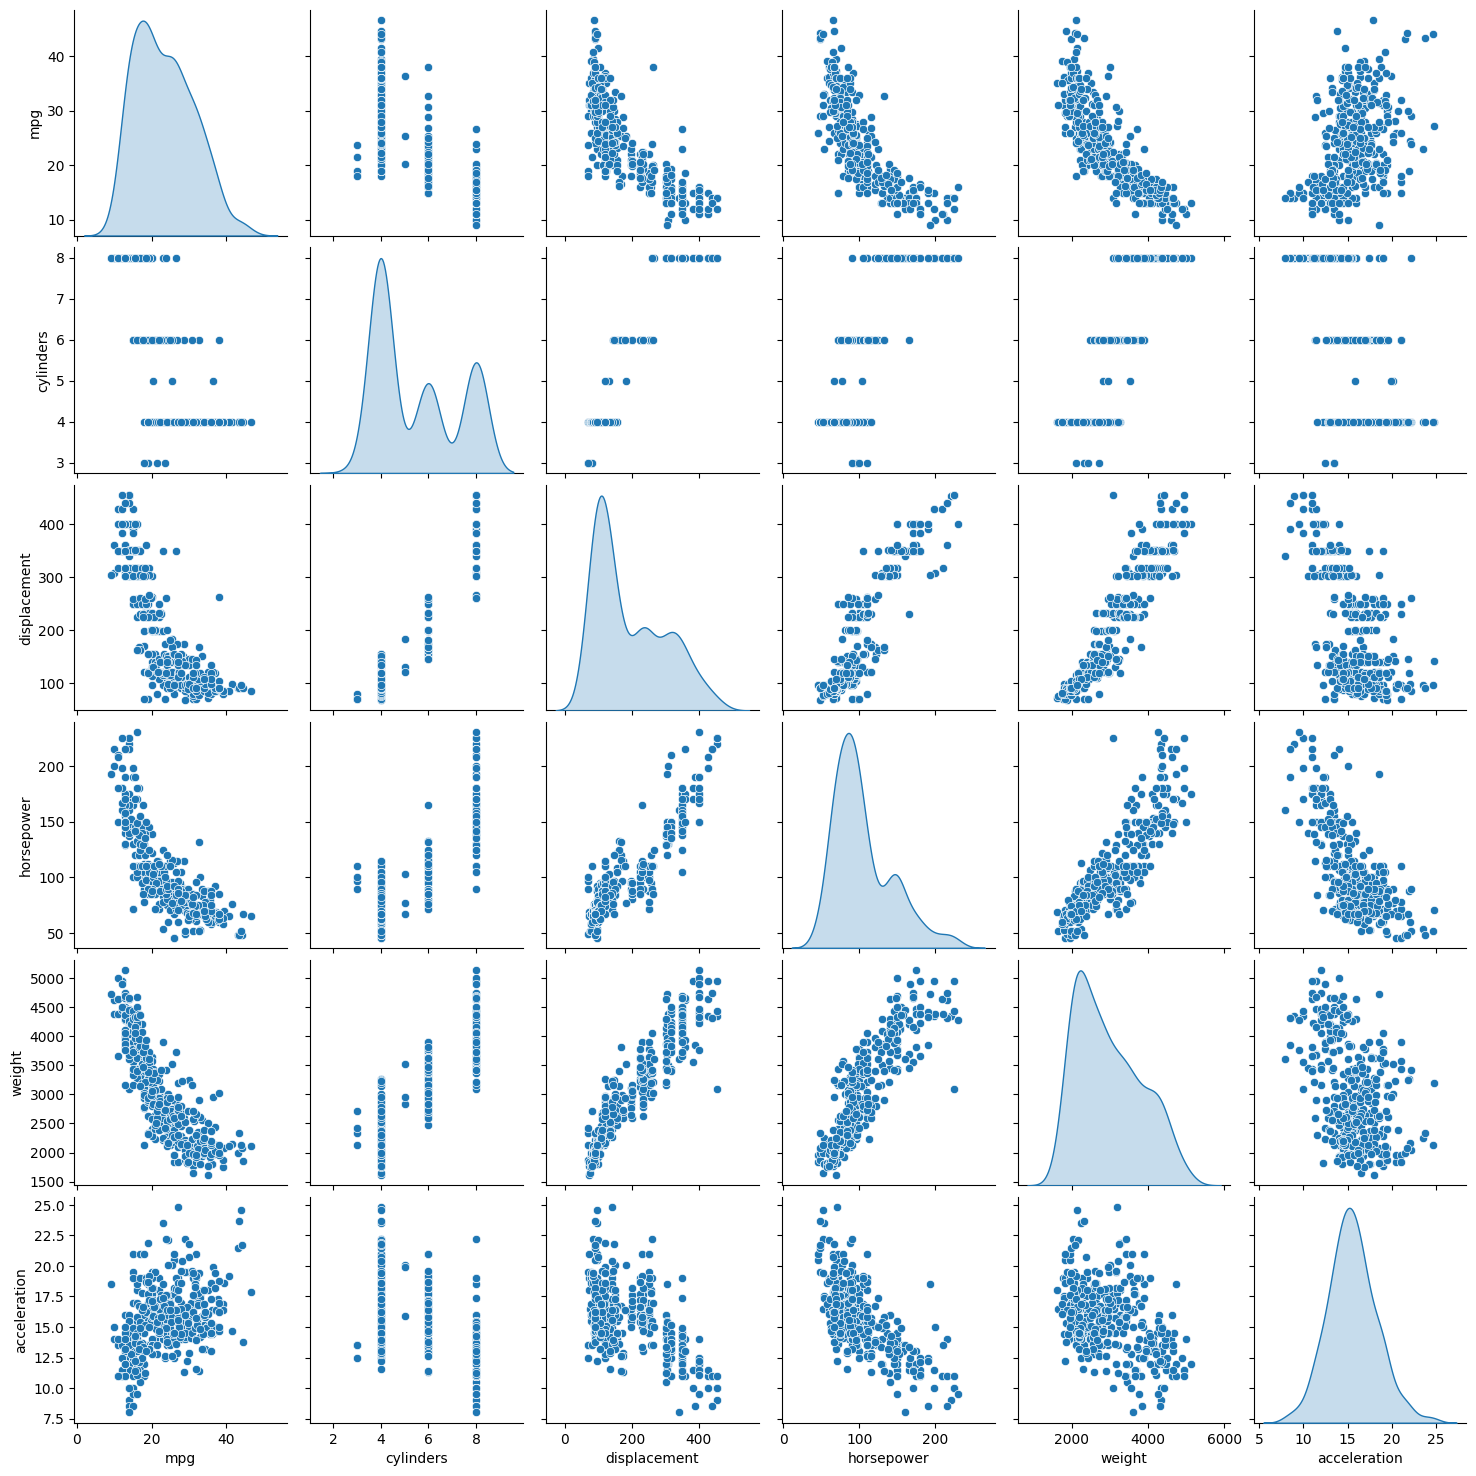

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the csv file
df = pd.read_csv("auto_dataset.csv",index_col=0)

#Plotting the pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()

## Least-squares lines with `NumPy`

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# find the shape of the auto dataset
df = pd.read_csv("auto_dataset.csv")
df.shape

(392, 7)

In [6]:
X = df["weight"]
Y = df["horsepower"]

X_b = np.c_[np.ones((392,1)),X] #here we are adding X_o = 1 to all the feature values
beta_values = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print(beta_values)

[-12.1834847    0.03917702]


In [7]:
X_new = np.array([[2500],[2045]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(beta_values)

print(f"Weight of car = 2500; predicted horsepower is {y_predict[0]:.3}; actual horsepower is 88")
print(f"Weight of car = 2045; predicted horsepower is {y_predict[1]:.3}; actual horsepower is 68")

Weight of car = 2500; predicted horsepower is 85.8; actual horsepower is 88
Weight of car = 2045; predicted horsepower is 67.9; actual horsepower is 68


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

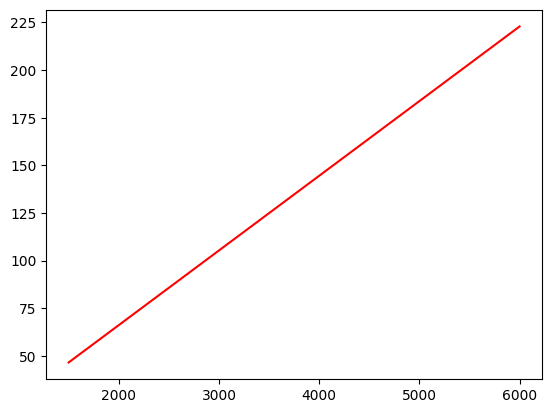

In [19]:
X_plot= np.array([[1500],[6000]])
X_plot_b = np.c_[np.ones((2,1)),X_plot]
Y_plot = X_plot_b.dot(beta_values)

Equationline = "Y = {:.3f}+{:.3f}X".format(beta_values[0], beta_values[1])

plt.plot(X_plot, Y_plot, "r-", label = Equationline)
sns.scatterplot(X,Y, label = "Training Data")
plt.legend()
plt.show()

<Axes: xlabel='horsepower', ylabel='horsepower'>

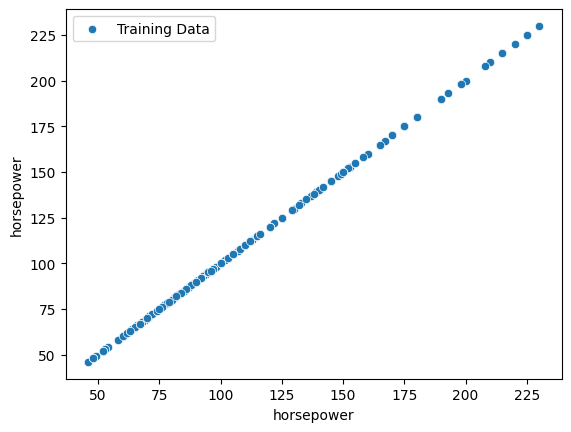

In [14]:
sns.scatterplot(x=X, y=Y, label="Training Data") # Pass X and y as keyword arguments

Next, we show how to find the model with scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
df = pd.read_csv("auto_dataset.csv")

X = df["weight"]
Y = df["horsepower"]

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

reg.fit(X, Y)

print("The value obtained for beta_o is:", reg.intercept_)
print("The value obtained for beta_1 is:", reg.coef_[0])

The value obtained for beta_o is: [-12.1834847]
The value obtained for beta_1 is: [0.03917702]


In [ ]:
# predict the output from a new datapoint
X_new = np.array([[2500],[2045]])
print(reg.predict(X_new))

[[85.75906307]
 [67.93351937]]


## Least-squares curves with `NumPy` and `SciPy`

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Importing the dataset as a pandas dataframe
df = pd.read_csv("auto_dataset.csv")

#Selecting the variables of interest
X = df["horsepower"]
y = df["mpg"]

#Converting the series to a column matrix
X_new = X.values.reshape(-1,1)
y_new = y.values.reshape(-1,1)

#Fitting y = beta0 + beta1x + beta2x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_new)

reg = LinearRegression()
reg.fit(X_poly, y_new)

print("Y = {:.4f} X^2 {:.3f} X + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0]))

Y = 0.0012 X^2 -0.466 X + 56.900


Let's plot the model.

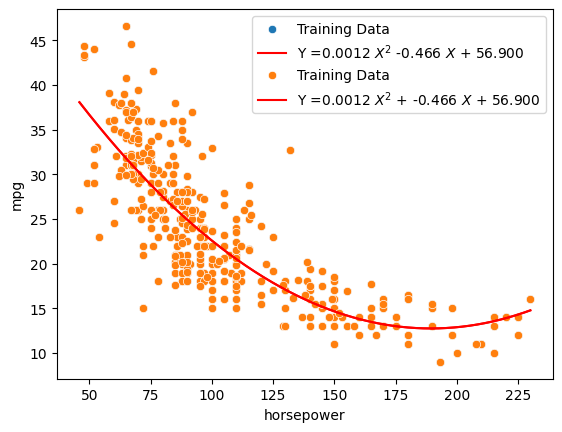

In [18]:
start = df["horsepower"].values.min()
stop = df["horsepower"].values.max()

X_plot = np.linspace(start, stop, 1000)
Y_plot = reg.coef_[0,1] * X_plot * X_plot + reg.coef_[0,0] * X_plot + reg.intercept_[0]

Equationline = "Y ={:.4f} $X^2$ {:.3f} $X$ + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0])

sns.scatterplot(x=X, y=y, label="Training Data")
plt.plot(X_plot, Y_plot, "r-", label=Equationline)
start = df["horsepower"].values.min()
stop = df["horsepower"].values.max()

X_plot = np.linspace(start, stop, 1000)
Y_plot = reg.coef_[0,1] * X_plot * X_plot + reg.coef_[0,0] * X_plot + reg.intercept_[0]

Equationline = "Y ={:.4f} $X^2$ + {:.3f} $X$ + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0])

sns.scatterplot(x=X, y=y, label="Training Data")
plt.plot(X_plot, Y_plot, "r-", label=Equationline)
plt.legend()
plt.show()
# has context menu - this line is a comment and does not cause a syntax error, but it's not python code

<Axes: xlabel='horsepower', ylabel='mpg'>

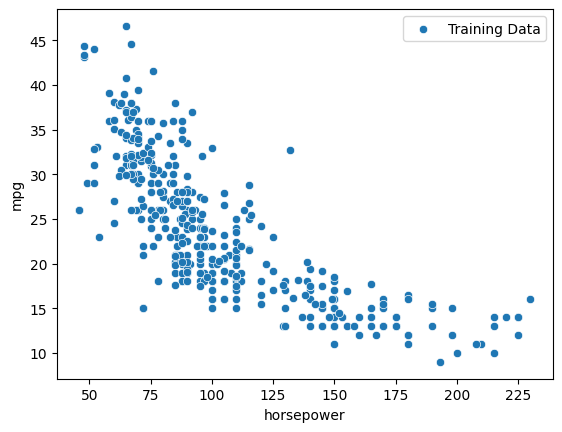

In [12]:
sns.scatterplot(x=X, y=y, label="Training Data") # Pass X and y as keyword arguments

### Least-squares surfaces with `NumPy` and `SciPy`

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#Importing the csv file and choosing the X and Y variables
df = pd.read_csv("auto_dataset.csv")

Y = df["displacement"]
X = df[["horsepower","weight"]]

#Fitting the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Printing the parameter values obtained after fitting the model
print("The value obtained for beta_o is: ", reg.intercept_)
print("The value obtained for beta_1 and beta_2 are: ",reg.coef_[0] , "and", reg.coef_[1] )

The value obtained for beta_o is:  -135.95073526530456
The value obtained for beta_1 and beta_2 are:  0.9757143655155813 and 0.07671670340152593


Let's plot the model.

No handles with labels found to put in legend.


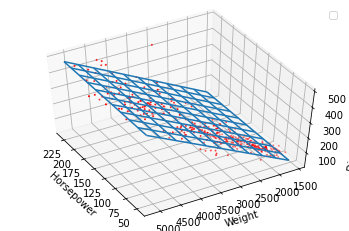

In [ ]:
# Plotting the surface plot
X1_min = df["horsepower"].values.min()
X1_max = df["horsepower"].values.max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].values.min()
X2_max = df["weight"].values.max()
X2_values = np.linspace(X2_min, X2_max, 100)

Y_reg = reg.intercept_ + (reg.coef_[0] * X1_values) + (reg.coef_[1] * X2_values)
Y_plot = Y_reg.reshape(-1,1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.horsepower, X.weight, Y, color="red", s=1)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)
surf = ax.plot_wireframe(X1_plot, X2_plot, Y_plot, rstride=10, cstride=10)

ax.view_init(50, 150)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')
plt.legend()
plt.show()

Q1 Assume the 3D plot is calculated as above, Please predict the following displacement based on the gioven horsepower and weight.

1) horsepower = 87 and weight is 2589, what is the displacement value?

2) horsepower = 175 and weight = 4800, what is the displacement?



In [24]:
import numpy as np

# Hypothetical coefficients for a linear model where displacement is a function of horsepower and weight
# These are made up for this example; in reality, you would derive these from data or known physics.
a = 0.1  # coefficient for horsepower
b = 0.001  # coefficient for weight
c = 50  # intercept or constant term

def predict_displacement(horsepower, weight):
    return a * horsepower + b * weight + c

# Predict displacement for given inputs
displacement_1 = predict_displacement(87, 2589)
displacement_2 = predict_displacement(175, 4800)

print(f"1) Horsepower = 87, Weight = 2589: Displacement = {displacement_1:.2f}")
print(f"2) Horsepower = 175, Weight = 4800: Displacement = {displacement_2:.2f}")

1) Horsepower = 87, Weight = 2589: Displacement = 61.29
2) Horsepower = 175, Weight = 4800: Displacement = 72.30


Q2 please predict the horse power based on the value of weight, acceleration and mpg.

Thereare 3 X values and 1 Y value. Please train the model

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Example data - replace with real data
data = {
    'weight': [2589, 3504, 3693, 2408, 2548],
    'acceleration': [14.5, 12.5, 11.5, 15.8, 17.0],
    'mpg': [18.0, 15.0, 18.0, 24.4, 22.8],
    'horsepower': [87, 107, 110, 62, 95]  # This is our target variable
}

df = pd.DataFrame(data)

# Prepare the features and target
X = df[['weight', 'acceleration', 'mpg']]
y = df['horsepower']

# Instantiate the model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Example prediction - replace these with actual values for prediction
new_data = pd.DataFrame({
    'weight': [3000],
    'acceleration': [13.0],
    'mpg': [20.0]
})

# Predict horsepower
predicted_horsepower = model.predict(new_data)
print(f"Predicted Horsepower: {predicted_horsepower[0]:.2f}")

# If you want to see the coefficients for each feature:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Predicted Horsepower: 81.04
Coefficients: [ 0.0474448   9.97378522 -2.88859577]
Intercept: -133.1804011106484


In [27]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load your dataset
df = pd.read_csv("auto_dataset.csv")  # Replace with the actual path to your dataset

# Select the independent variables and dependent variable
X = df[["weight", "acceleration", "mpg"]]
Y = df["horsepower"]

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Create a meshgrid for weight and acceleration (fixed mpg value of 25)
weight_range = np.linspace(X["weight"].min(), X["weight"].max(), 30)
acc_range = np.linspace(X["acceleration"].min(), X["acceleration"].max(), 30)
weight_grid, acc_grid = np.meshgrid(weight_range, acc_range)

# Assume mpg = 25 (fixed value for simplicity)
mpg_value = 25  # You can change this value to explore different scenarios

# Predict horsepower values using the regression model
horsepower_grid = reg.intercept_ + reg.coef_[0] * weight_grid + reg.coef_[1] * acc_grid + reg.coef_[2] * mpg_value

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(
    z=horsepower_grid, x=weight_grid, y=acc_grid,
    colorscale='Viridis', opacity=0.8)])

# Add the actual data points to the plot (as red markers)
fig.add_trace(go.Scatter3d(
    x=X["weight"], y=X["acceleration"], z=Y,
    mode='markers', marker=dict(size=5, color='red')))

# Update plot layout for titles and axes labels
fig.update_layout(
    title="Interactive 3D Linear Regression Model",
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Acceleration',
        zaxis_title='Horsepower'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive plot
fig.show()